In [91]:
%load_ext autoreload
%autoreload 2
import sys;sys.path.append('modules')
from utils import *


%matplotlib inline    
import matplotlib.pyplot as plt
plt.rc('font', family='serif')
plt.rc('xtick', labelsize='x-large')
plt.rc('ytick', labelsize='x-large')
params = {'legend.fontsize': 18,
          'figure.figsize': (12, 8),
          'axes.labelsize':  18,
          'axes.titlesize':  18,
          'xtick.labelsize': 18,
          'ytick.labelsize': 18,
          'image.cmap':'jet',
          'lines.markersize': 5 }
plt.rcParams.update(params)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [86]:
fill_number = 6711
fill_info = get_fill_info(fill_number)

In [87]:
print fill_info['BEAMDUMP']

{'duration': Timedelta('0 days 00:00:23.401000'), 'endTime': Timestamp('2018-05-22 14:27:20.236000+0000', tz='UTC'), 'startTime': Timestamp('2018-05-22 14:26:56.835000+0000', tz='UTC')}


In [88]:
modes = ['BEAMDUMP']
time = {}
time['BEAMDUMP'] = (fill_info['BEAMDUMP']['startTime'], fill_info['BEAMDUMP']['endTime'])
df = get_data(modes, time)

In [89]:
df_fft = get_fft(df)

B1 H BEAMDUMP
B1 V BEAMDUMP
B2 H BEAMDUMP
B2 V BEAMDUMP


B1 H BEAMDUMP
300  strongest absolute correlations
Top Absolute Correlations
1    3      0.744567
3    62     0.351994
0    2      0.346794
2    4      0.328791
0    4      0.326784
     1      0.303366
6    84     0.302775
1    62     0.280498
38   83     0.275872
21   99     0.271003
63   64     0.262320
2    24     0.259498
     28     0.256273
0    73     0.252194
30   104    0.252070
64   82     0.248652
1    2      0.248392
     35     0.244137
3    35     0.243458
5    74     0.240111
31   56     0.239913
34   38     0.238691
55   92     0.238228
9    81     0.236638
91   105    0.233628
5    105    0.232967
9    58     0.231193
55   104    0.231120
6    37     0.230810
15   66     0.227142
              ...   
18   37     0.163877
57   107    0.163709
17   68     0.163649
51   70     0.163616
96   99     0.163614
35   109    0.163256
64   111    0.163052
46   85     0.163013
44   45     0.162923
73   76     0.162905
96   106    0.162828
50   52     0.162793
34   41     0.162775

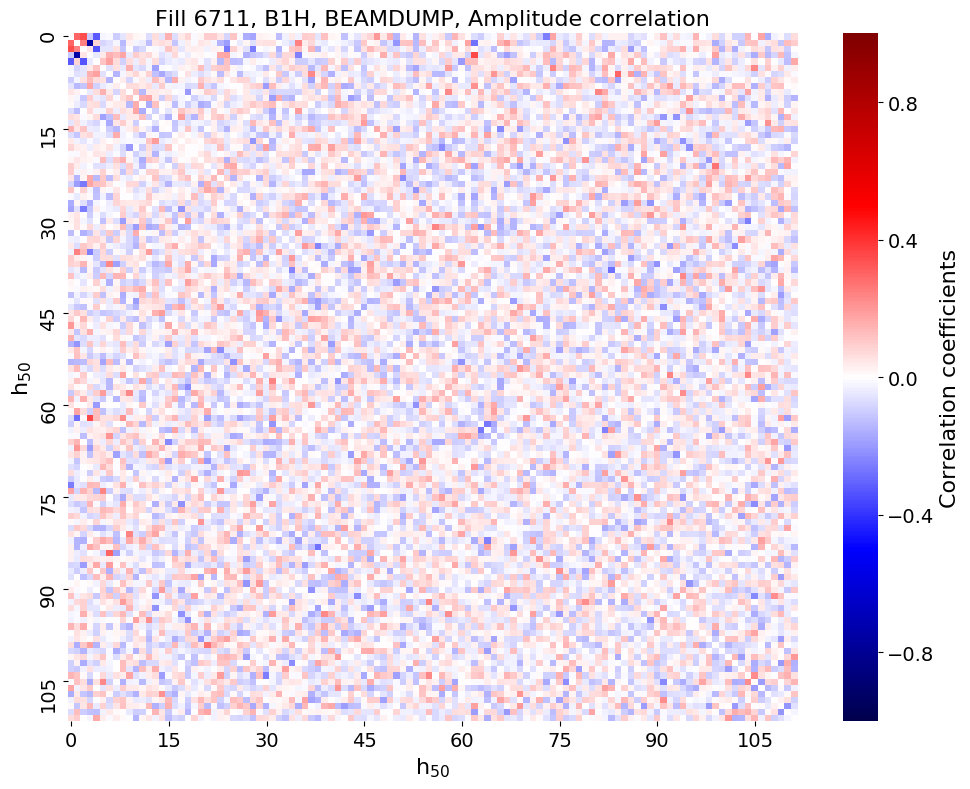

In [93]:
#%matplotlib notebook
#fig,ax = plt.subplots(ncols=2,nrows=2, figsize=(12,10),sharex=True, sharey=True)
#corr, strongest, bins, pvals = heatmaps(df_fft, status=['BEAMDUMP'], beam=['B1', 'B2'], plane=['H', 'V'], mode='amplitude', ax=ax)
corr, strongest, bins, pvals = heatmaps(df_fft, status=['BEAMDUMP'], beam=['B1'], plane=['H'], mode='amplitude')
plt.xlabel(r'$\rm h_{50}$')
plt.ylabel(r'$\rm h_{50}$')
plt.title('Fill %s, B1H, BEAMDUMP, Amplitude correlation' %fill_number)
plt.tight_layout()
plt.show()

In [79]:
modes = ['BEAMDUMP']
time = {}
time['BEAMDUMP'] = (fill_info['BEAMDUMP']['startTime'], pd.Timestamp('2018-05-22 14:27:00+00:00'))
df = get_data(modes, time, remove_overlap=True, n=30000)
print df

Flatten: ...
average overlap 248.72 samples
Flatten: ...
average overlap 248.72 samples
Flatten: ...
average overlap 248.74 samples
Flatten: ...
average overlap 248.74 samples
{'B1': {'H': {'tbt': {'BEAMDUMP':                                     ALB.SR4.B1:FGC_FREQ  \
0     [400789730.367, 400789730.367, 400789730.367, ...   
1     [400789730.367, 400789730.367, 400789730.367, ...   
2     [400789730.367, 400789730.367, 400789730.367, ...   
3     [400789730.367, 400789730.367, 400789730.367, ...   
4     [400789730.367, 400789730.367, 400789730.367, ...   
5     [400789730.367, 400789730.367, 400789730.367, ...   
6     [400789730.367, 400789730.367, 400789730.367, ...   
7     [400789730.367, 400789730.367, 400789730.367, ...   
8     [400789730.367, 400789730.367, 400789730.367, ...   
9     [400789730.367, 400789730.367, 400789730.367, ...   
10    [400789730.367, 400789730.367, 400789730.367, ...   
11    [400789730.367, 400789730.367, 400789730.367, ...   
12    [400789730.367, 4

<IPython.core.display.Javascript object>


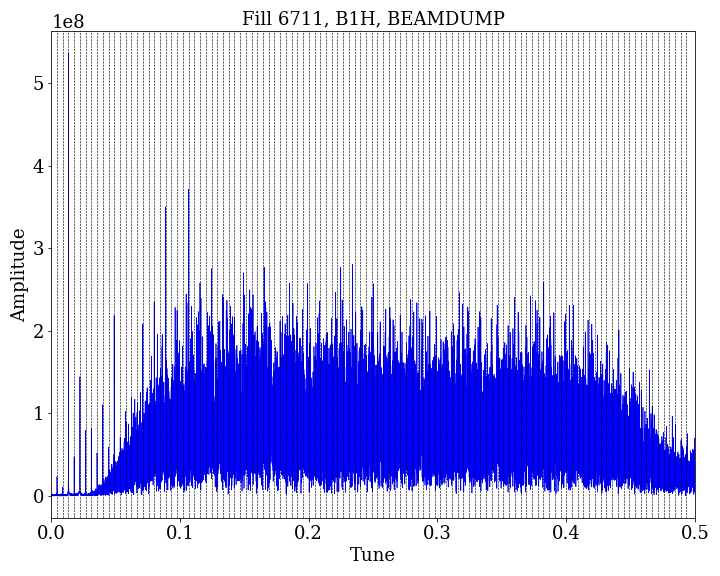

In [80]:
%matplotlib notebook
fig1, ax1 = plt.subplots(figsize=(10,8))
data_b1h = df.B1.H.tbt.BEAMDUMP['LHC.BQBBQ.CONTINUOUS_HS.B1:ACQ_DATA_H'].iloc[0]
data_all = [data_b1h]

label = ['B1H']
counter = 0
counter1 = [0,0,1,1]
counter2 = [0,1,0,1]
cc = ['b', 'orange', 'g', 'r']
for data in data_all:
  data = data-np.mean(data)
  c1 = cc[counter]
  fourier = np.fft.rfft(data)
  freqs = np.fft.rfftfreq(len(fourier)*2-1)
  #plt.plot(freqs, (abs(fourier)/max(abs(fourier))) + counter, label = label[counter])
  ax1.plot(freqs, (abs(fourier)), c=c1 ,linewidth=0.7)
  counter += 1


  frf = 400789730.367
  h = 35640.
  harm = 50 / (frf / h)
  for i in range(1,112):
    plt.axvline(i*harm, linestyle='--', linewidth=0.6, c='k')
  #plt.ylim([0, 3e9])
  plt.legend(loc=1)
  plt.xlim([0,0.5])
  plt.xlabel('Tune')
  plt.ylabel('Amplitude')
  plt.title('Fill %s, B1H, BEAMDUMP' %fill_number)
  fig1.tight_layout()
  #plt.ylabel('Normalised amplitude')
  freqs_bd = freqs
  fourier_bd = fourier

<IPython.core.display.Javascript object>


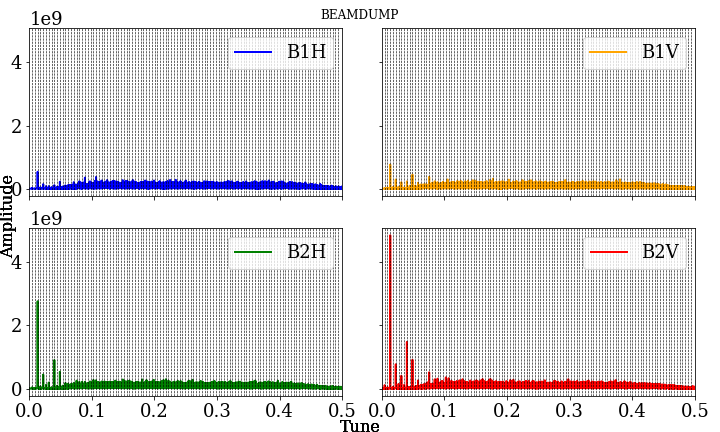

In [59]:
%matplotlib notebook
fig1, ax1 = plt.subplots(figsize=(10,6), nrows=2, ncols=2, sharex=True, sharey=True)
data_b1h = df.B1.H.tbt.BEAMDUMP['LHC.BQBBQ.CONTINUOUS_HS.B1:ACQ_DATA_H'].iloc[0]
data_b1v = df.B1.V.tbt.BEAMDUMP['LHC.BQBBQ.CONTINUOUS_HS.B1:ACQ_DATA_V'].iloc[0]
data_b2h = df.B2.H.tbt.BEAMDUMP['LHC.BQBBQ.CONTINUOUS_HS.B2:ACQ_DATA_H'].iloc[0]
data_b2v = df.B2.V.tbt.BEAMDUMP['LHC.BQBBQ.CONTINUOUS_HS.B2:ACQ_DATA_V'].iloc[0]
data_all = [data_b1h, data_b1v, data_b2h, data_b2v]

label = ['B1H', 'B1V', 'B2H', 'B2V']
counter = 0
counter1 = [0,0,1,1]
counter2 = [0,1,0,1]
cc = ['b', 'orange', 'g', 'r']
for data in data_all:
  data = data-np.mean(data)
  c1 = cc[counter]
  fourier = np.fft.rfft(data)
  freqs = np.fft.rfftfreq(len(fourier)*2-1)
  #plt.plot(freqs, (abs(fourier)/max(abs(fourier))) + counter, label = label[counter])
  plt.sca(ax1[counter1[counter], counter2[counter]])
  ax1[counter1[counter], counter2[counter]].plot(freqs, (abs(fourier)), c=c1 , label = label[counter])
  counter += 1


  frf = 400789730.367
  h = 35640.
  harm = 50 / (frf / h)
  for i in range(1,112):
    plt.axvline(i*harm, linestyle='--', linewidth=0.6, c='k')
  #plt.ylim([0, 3e9])
  plt.legend(loc=1)
  plt.xlim([0,0.5])
  plt.suptitle('BEAMDUMP')
  #plt.xlabel('Tune')
  fig1.text(0.5, 0.00, 'Tune', ha='center', fontsize=16)
  fig1.text(0.0, 0.5, 'Amplitude', va='center', rotation='vertical', fontsize=16)
  fig1.tight_layout()
  #plt.ylabel('Normalised amplitude')


In [81]:
modes = ['RAMP']
time = {}
print fill_info['RAMP']
time['RAMP'] = (fill_info['RAMP']['startTime'],  pd.Timestamp('2018-05-22 00:31:02+00:00'))
df = get_data(modes, time, remove_overlap=True, n=30000)
#print df

{'duration': Timedelta('0 days 00:20:22.524000'), 'endTime': Timestamp('2018-05-22 00:51:20.999000+0000', tz='UTC'), 'startTime': Timestamp('2018-05-22 00:30:58.475000+0000', tz='UTC')}
Flatten: ...
average overlap 248.71 samples
Flatten: ...
average overlap 248.71 samples
Flatten: ...
average overlap 248.76 samples
Flatten: ...
average overlap 248.76 samples


<IPython.core.display.Javascript object>


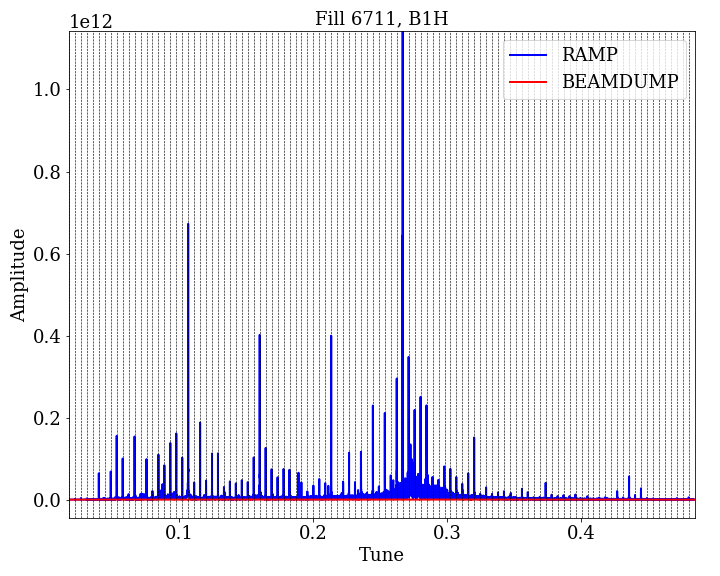

In [84]:
%matplotlib notebook
fig1, ax1 = plt.subplots(figsize=(10,8))
data_b1h = df.B1.H.tbt.RAMP['LHC.BQBBQ.CONTINUOUS_HS.B1:ACQ_DATA_H'].iloc[0]
data_all = [data_b1h]

label = ['B1H']
counter = 0
counter1 = [0,0,1,1]
counter2 = [0,1,0,1]
cc = ['b', 'orange', 'g', 'r']
for data in data_all:
  data = data-np.mean(data)
  c1 = cc[counter]
  fourier = np.fft.rfft(data)
  freqs = np.fft.rfftfreq(len(fourier)*2-1)
  #plt.plot(freqs, (abs(fourier)/max(abs(fourier))) + counter, label = label[counter])
  ax1.plot(freqs, (abs(fourier)), c=c1,label='RAMP' )
  ax1.plot(freqs_bd, (abs(fourier_bd)), c='r' ,label='BEAMDUMP') 
  counter += 1


  frf = 400789730.367
  h = 35640.
  harm = 50 / (frf / h)
  for i in range(1,112):
    plt.axvline(i*harm, linestyle='--', linewidth=0.6, c='k')
  #plt.ylim([1e4, 1e12])
  plt.legend(loc=1)
  plt.xlim([0,0.5])
  plt.xlabel('Tune')
  plt.ylabel('Amplitude')
  plt.title('Fill %s, B1H' %fill_number)
  plt.legend(loc=1)
  fig1.tight_layout()
  #plt.ylabel('Normalised amplitude')


<IPython.core.display.Javascript object>


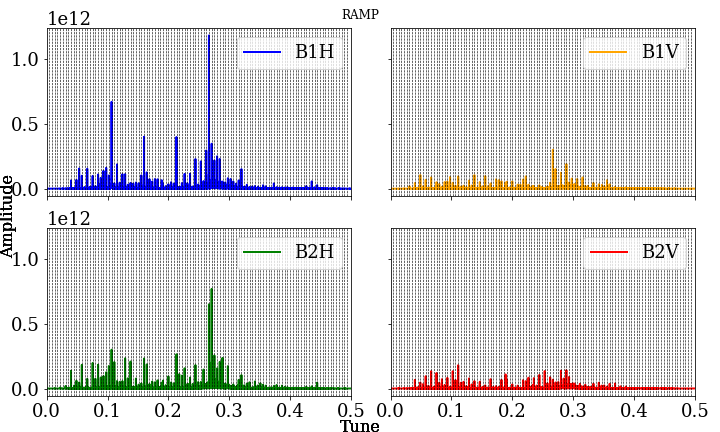

In [65]:
%matplotlib notebook
fig1, ax1 = plt.subplots(figsize=(10,6), nrows=2, ncols=2, sharex=True, sharey=True)
data_b1h = df.B1.H.tbt.RAMP['LHC.BQBBQ.CONTINUOUS_HS.B1:ACQ_DATA_H'].iloc[0]
data_b1v = df.B1.V.tbt.RAMP['LHC.BQBBQ.CONTINUOUS_HS.B1:ACQ_DATA_V'].iloc[0]
data_b2h = df.B2.H.tbt.RAMP['LHC.BQBBQ.CONTINUOUS_HS.B2:ACQ_DATA_H'].iloc[0]
data_b2v = df.B2.V.tbt.RAMP['LHC.BQBBQ.CONTINUOUS_HS.B2:ACQ_DATA_V'].iloc[0]
data_all = [data_b1h, data_b1v, data_b2h, data_b2v]

label = ['B1H', 'B1V', 'B2H', 'B2V']
counter = 0
counter1 = [0,0,1,1]
counter2 = [0,1,0,1]
cc = ['b', 'orange', 'g', 'r']
for data in data_all:
  data = data-np.mean(data)
  c1 = cc[counter]
  fourier = np.fft.rfft(data)
  freqs = np.fft.rfftfreq(len(fourier)*2-1)
  #plt.plot(freqs, (abs(fourier)/max(abs(fourier))) + counter, label = label[counter])
  plt.sca(ax1[counter1[counter], counter2[counter]])
  ax1[counter1[counter], counter2[counter]].plot(freqs, (abs(fourier)), c=c1 , label = label[counter])
  counter += 1


  frf = 400789730.367
  h = 35640.
  harm = 50 / (frf / h)
  for i in range(1,112):
    plt.axvline(i*harm, linestyle='--', linewidth=0.6, c='k')
  #plt.ylim([0, 3e9])
  plt.legend(loc=1)
  plt.xlim([0,0.5])
  plt.suptitle('RAMP')
  #plt.xlabel('Tune')
  fig1.text(0.5, 0.00, 'Tune', ha='center', fontsize=16)
  fig1.text(0.0, 0.5, 'Amplitude', va='center', rotation='vertical', fontsize=16)
  fig1.tight_layout()
  #plt.ylabel('Normalised amplitude')
